# Lesson 5 Assignment - Targeted Marketing Campaign

## Author - Studentname

In this problem we will use historical data from past customer responses to build a classification model.

We will apply the trained model to a new set of prospects to whom we may want extend an offer for a [Personal Equity Plan](https://www.investopedia.com/terms/p/pep.asp). Rather than doing a mass marketing campaign to all new prospects, we would like to target those that are likely to respond positively to our offer (according to our classification model).

## Tasks
Use the provided Bank Data.csv file: 

1. Read in, parse and preprocess the data
2. Perform a brief exploratory analysis
3. Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
4. Graph the structure of your decision tree
5. Graph the confusion matrix of your random forest model


In [93]:
# Data set contains 600 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Bank%20Data.csv"


In [94]:
# Import libraries
import pandas as pd
import numpy as np
import re
import pandas_profiling
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix
from sklearn.metrics import roc_auc_score
from sklearn import tree
import category_encoders as ce
import os
from IPython.display import Image
import matplotlib.pyplot as plt

In [156]:
#Load dataset
bank_df = pd.read_csv(URL)

In [165]:
bank_df.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


Dataset consists of 11 columns and 600 rows. 
Dataset contains numerical and object data.
Doesn't have missing data.

In [167]:
#Descriptive statistics of dataset
bank_df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [168]:
#Exploratory analysis
pandas_profiling.ProfileReport(bank_df)

Number of variables,11
Number of observations,600
Total Missing (%),0.0%
Total size in memory,51.6 KiB
Average record size in memory,88.1 B
Numeric,3
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


* There are no missing data
* Columns 'sex', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage', 'pep' are categorical and should be decoded

In [169]:
#Decode variables with possible values "Yes" or "No"
bank_df = bank_df.replace('YES', 1)
bank_df = bank_df.replace('NO', 0)

In [170]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
age            600 non-null int64
sex            600 non-null object
region         600 non-null object
income         600 non-null float64
married        600 non-null int64
children       600 non-null int64
car            600 non-null int64
save_act       600 non-null int64
current_act    600 non-null int64
mortgage       600 non-null int64
pep            600 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 51.6+ KB


In [171]:
X = bank_df.iloc[:, 0:-1] #Load features into X df 
Y = bank_df.iloc[:, -1] # Load target ("pep") into Y DF

In [185]:
np.random.seed(101)

In [186]:
#Getting dummy variables for "sex" variable
sex_dummies = pd.get_dummies(X['sex'], prefix = 'sex')
X = pd.concat([X, sex_dummies], axis=1)

KeyError: 'sex'

In [173]:
#Getting dummy variables for "region" variable
region_dummies = pd.get_dummies(X['region'], prefix = 'region')
X = pd.concat([X, region_dummies], axis=1)

In [174]:
#Delete original columns 
X = X.drop(['sex', 'region'], axis = 1)

In [187]:
#Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

### Decision tree classifier ###

In [188]:
#Classificator initialisation
tree_clf = DecisionTreeClassifier(random_state = 0)

In [189]:
#Get list hyperparameters
tree_clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [190]:
#Parameters and their values that'll be checked
parameters_grid = {
  'criterion': ['entropy', 'gini'] ,
  'max_depth': [3,4,5,6,7],
  'min_samples_leaf' : [2,3,4,5,6,7,8],
  'min_samples_split' : [2,3,4,5,6,7,8],
}

In [191]:
#Cross validation parameters
cv = cross_validation.KFold(len(X_train) , n_folds = 5 , random_state=7)

In [192]:
#Grid search
grid_cv = grid_search.GridSearchCV(tree_clf, parameters_grid, scoring = 'accuracy', cv = cv )

In [201]:
#Fit model
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=480, n_folds=5, shuffle=False, random_state=7),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [203]:
#Get list of best set of parameters for Desicion tree classifier
grid_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [204]:
# Use gini max_depth=7, min_samples_leaf= 5, min_samples_split=2
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_leaf= 6, min_samples_split=2).fit(X_train, np.ravel(y_train)) 
y_tree_pred = model_tree.predict(X_test)

In [205]:
#Model performance
print("Decision tree accuracy is : {}%".format(accuracy_score(y_test, y_tree_pred)*100))
print("Decision tree AUC: {:.3f}".format(roc_auc_score(y_test, y_tree_pred)))

Decision tree accuracy is : 83.33333333333334%
Decision tree AUC: 0.832


### Random forest classifier ###

In [ ]:
#Classificator initialisation.I'm going to use the same parameters for tree (max depth, min_samples_leaf,min_samples_split) as was found for desicion tree classifier
forest_clf = RandomForestClassifier(criterion='gini', max_depth=7, min_samples_leaf= 6, min_samples_split=2, random_state = 0)

In [208]:
#Get list hyperparameters
forest_clf.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [221]:
#Parameters and their values that'll be checked
parameters_forest_grid = {
  'n_estimators': [5,10,15,20],
  'n_jobs': [2,3,4,5,6,7,8,9,10]
}

In [222]:
#Grid search
grid_forest_cv = grid_search.GridSearchCV(forest_clf, parameters_forest_grid, scoring = 'accuracy', cv = cv )

In [ ]:
#Fit model
grid_forest_cv.fit(X_train, np.ravel(y_train))

In [212]:
#Get list of best set of parameters for Desicion tree classifier
grid_forest_cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [213]:
# Use gini, n_estimators=15, n_jobs=2
model_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20,n_jobs=2,
            oob_score=False, random_state=0, verbose=0,warm_start=False).fit(X_train, np.ravel(y_train)) 
y_forest_pred = model_forest.predict(X_test)

In [214]:
#Model performance
print("Random forest accuracy is : {}%".format(accuracy_score(y_test, y_forest_pred)*100))
print("Random forest AUC: {:.3f}".format(roc_auc_score(y_test, y_forest_pred)))

Random forest accuracy is : 82.5%
Random forest AUC: 0.812


In [215]:
# View a list of the features and their importance scores
list(zip(X, model_forest.feature_importances_))

[('age', 0.1195525256813625),
 ('income', 0.23910371291604907),
 ('married', 0.12741084324987814),
 ('children', 0.2600827726630292),
 ('car', 0.013839909052328519),
 ('save_act', 0.056733775816715085),
 ('current_act', 0.016422460498637236),
 ('mortgage', 0.081355351962847502),
 ('sex_FEMALE', 0.015191488856359917),
 ('sex_MALE', 0.0068622883966752675),
 ('region_INNER_CITY', 0.02397596075042022),
 ('region_RURAL', 0.0054417692101626598),
 ('region_SUBURBAN', 0.012441361776580666),
 ('region_TOWN', 0.021585779168953934)]

### Results visualisation ###

In [216]:
#create a visualization of the tree
dotfile = open("dtree1.dot", 'w')
tree.export_graphviz(model_tree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

# Convert the dot file to a png
import os
os.system("dot -Tpng dtree1.dot -o dtree1.png")

0

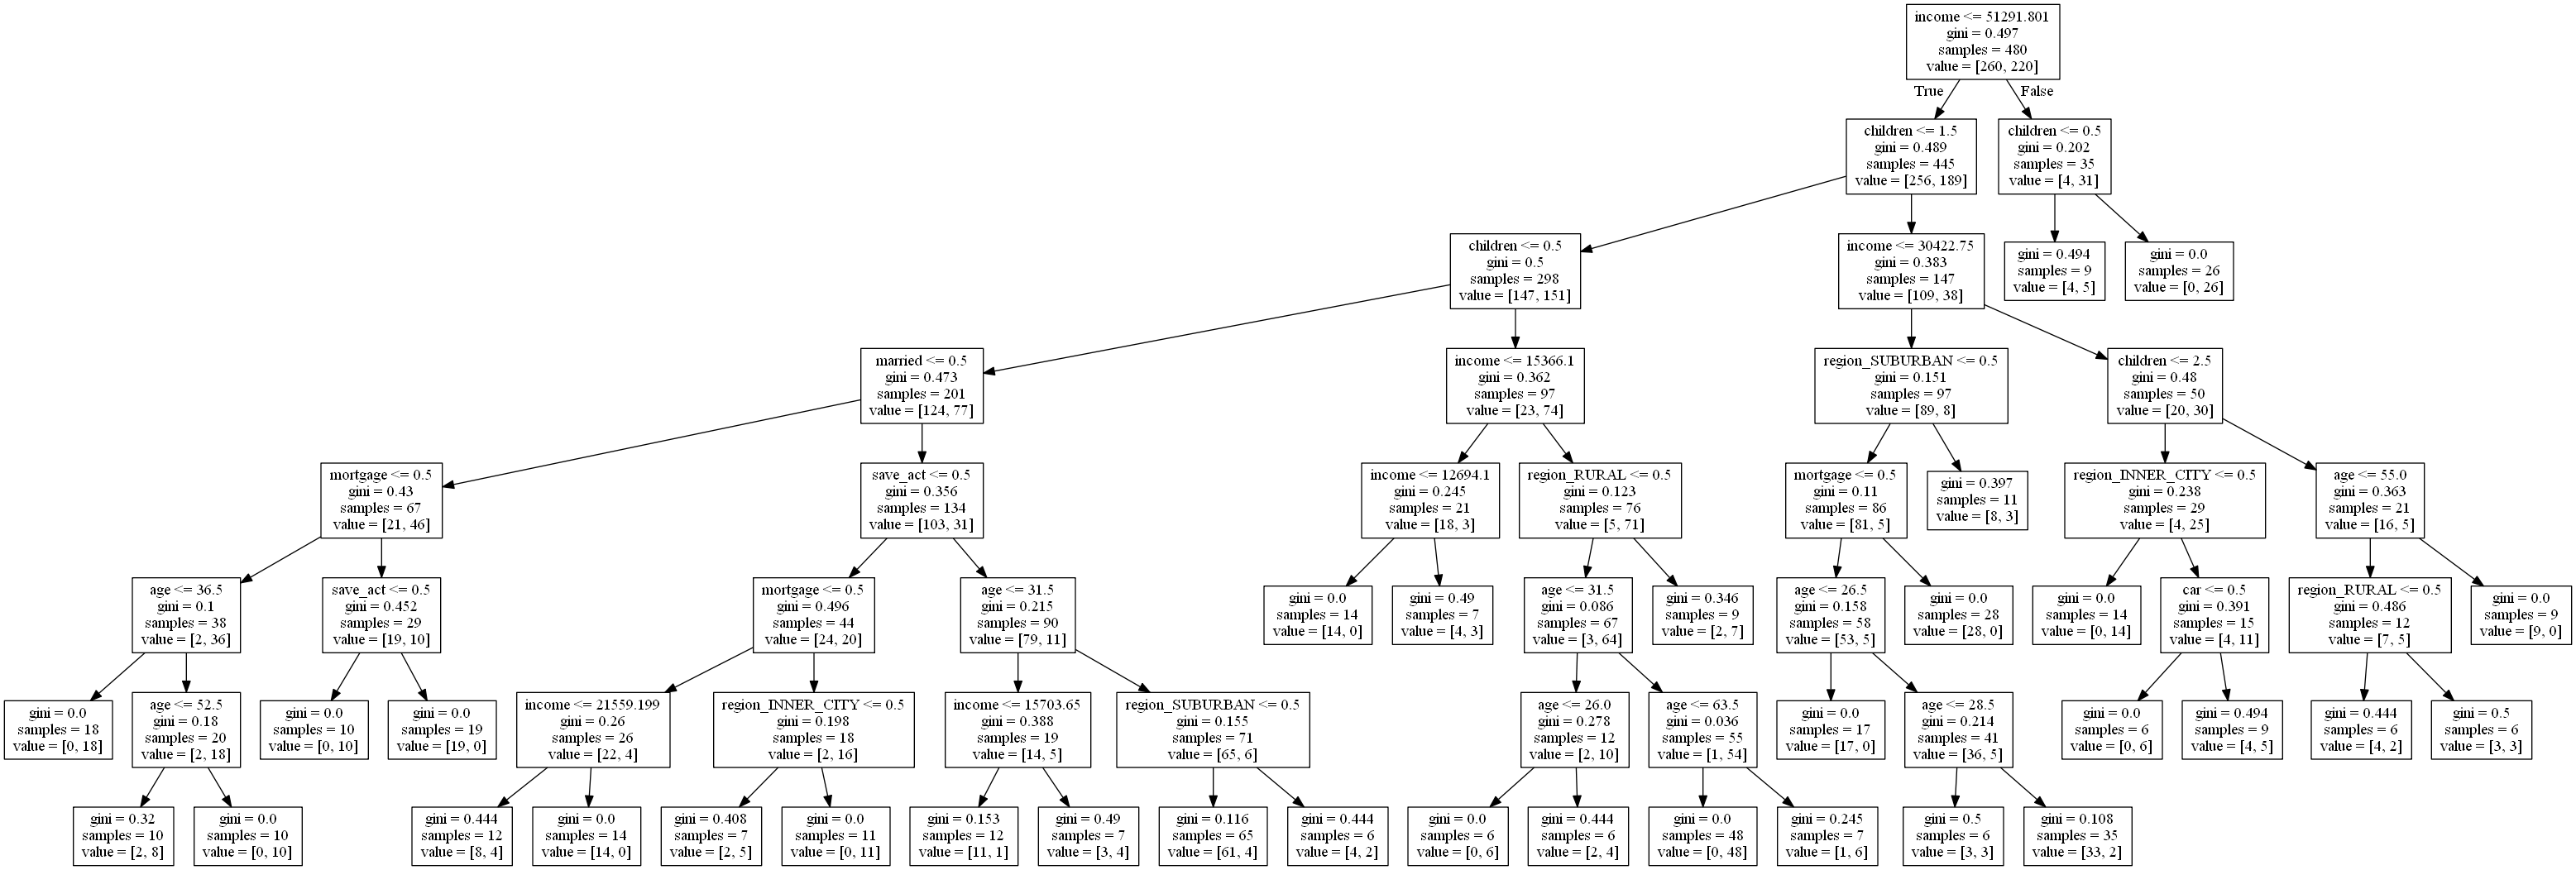

In [217]:
# show the png
Image(filename='dtree1.png', width=1000, height=1000) 

In [218]:
#create confusion matrix
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_test, y_forest_pred)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False         10     3       13
True           7     5       12
__all__       17     8       25


In [151]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_test, y_forest_pred)

array([[59,  7],
       [16, 38]], dtype=int64)

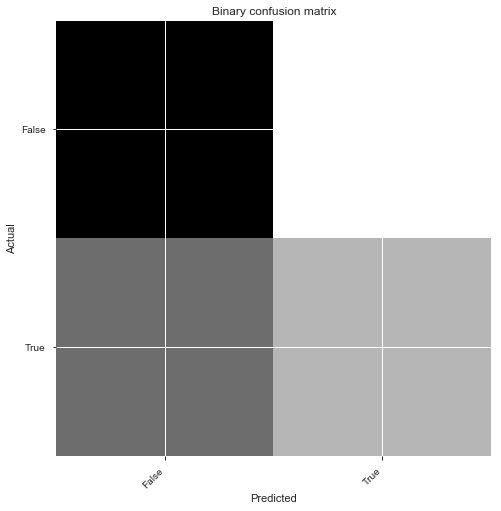

In [219]:
#Plot confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt

confusion_matrix.plot()

## SUMMARY ##

Decision tree classifier and Random Forest show pretty equal performance, but Random forest is more stable for noice.